In [2]:
import pandas as pd
import math
hinode_df = pd.read_csv("../flare_labeled/SOTSP_2010.csv")

In [3]:
bflares = [":".join(bflare.split(":")[:-1]) for bflare in hinode_df["BFlare"]if type(bflare)!=float] # SOL_standardを抽出
bflares

['SOL2010-05-09T15:23:00L223C051',
 'SOL2010-05-09T20:48:00L221C050',
 'SOL2010-05-23T16:45:00L324C071:B1.4   SOL2010-05-23T16:45:00L325C070',
 'SOL2010-07-29T00:50:00L201C114',
 'SOL2010-09-06T06:32:00L058C069',
 'SOL2010-10-26T14:48:00L060C069',
 'SOL2010-10-29T06:34:00L060C073',
 'SOL2010-11-18T11:37:00L103C122']

In [4]:
bflares[0]

'SOL2010-05-09T15:23:00L223C051'

In [5]:
from sunpy.net import hek
client = hek.HEKClient()
tstart = "2010-05-09"
tend = "2010-05-10"
event_type = 'FL'
results = client.search(hek.attrs.Time(tstart,tend),hek.attrs.EventType(event_type))

In [6]:
results

SOL_standard,active,ar_compactnesscls,ar_mcintoshcls,ar_mtwilsoncls,ar_noaaclass,ar_noaanum,ar_numspots,ar_penumbracls,ar_polarity,ar_zurichcls,area_atdiskcenter,area_atdiskcenteruncert,area_raw,area_uncert,area_unit,bound_ccnsteps,bound_ccstartc1,bound_ccstartc2,bound_chaincode,boundbox_c1ll,boundbox_c1ur,boundbox_c2ll,boundbox_c2ur,chaincodetype,comment_count,concept,event_avg_rating,event_c1error,event_c2error,event_clippedspatial,event_clippedtemporal,event_coord1,event_coord2,event_coord3,event_coordsys,event_coordunit,event_description,event_endtime,event_expires,event_importance,event_importance_num_ratings,event_mapurl,event_maskurl,event_npixels,event_peaktime,event_pixelunit,event_probability,event_score,event_starttime,event_testflag,event_title,event_type,eventtype,fl_efoldtime,fl_efoldtimeunit,fl_fluence,fl_fluenceunit,fl_goescls,fl_halphaclass,fl_peakem,fl_peakemunit,fl_peakflux,fl_peakfluxunit,fl_peaktemp,fl_peaktempunit,frm_contact,frm_daterun,frm_humanflag,frm_identifier,frm_institute,frm_name,frm_paramset,frm_specificid,frm_url,frm_versionnumber,gs_galleryid,gs_imageurl,gs_movieurl,gs_thumburl,hcr_checked,hgc_bbox,hgc_boundcc,hgc_coord,hgc_x,hgc_y,hgs_bbox,hgs_boundcc,hgs_coord,hgs_x,hgs_y,hpc_bbox,hpc_boundcc,hpc_coord,hpc_geom,hpc_radius,hpc_x,hpc_y,hrc_a,hrc_bbox,hrc_boundcc,hrc_coord,hrc_r,intenskurt,intensmax,intensmean,intensmedian,intensmin,intensskew,intenstotal,intensunit,intensvar,kb_archivdate,kb_archivid,kb_archivist,noposition,obs_channelid,obs_dataprepurl,obs_firstprocessingdate,obs_includesnrt,obs_instrument,obs_lastprocessingdate,obs_levelnum,obs_meanwavel,obs_observatory,obs_title,obs_wavelunit,rasterscan,rasterscantype,refs,refs_orig,revision,search_channelid,search_frm_name,search_instrument,search_observatory,skel_chaincode,skel_curvature,skel_nsteps,skel_startc1,skel_startc2,sum_overlap_scores
str30,str4,str1,str1,str1,str1,int64,object,str1,object,str1,object,object,object,object,str1,object,object,object,str1,int64,int64,int64,int64,str1,str1,str5,object,int64,int64,str1,str1,int64,int64,object,str12,str7,str1,str19,str1,object,str1,str1,str1,object,str19,str1,object,str20,str19,str5,str1,str2,str1,object,str1,object,str1,str4,str1,object,str1,object,str1,object,str1,str23,str19,str5,str9,str61,str17,str57,str1,str82,object,str1,str1,str1,str1,str4,str87,str1,str20,float64,int64,str66,str1,str12,int64,int64,str95,str1,str22,str186,str19,float64,float64,float64,str110,str1,str41,float64,object,object,object,object,object,object,object,str1,object,str19,str73,str11,str5,str3,str1,str1,str1,str4,str1,object,float64,str4,str1,str2,str1,str1,object,str1,str1,str19,str17,str4,str4,str1,object,object,object,object,str20
SOL2010-05-09T15:23:00L223C051,true,,,,,1069,None,,None,,None,None,None,None,,None,None,None,,85,87,38,40,,0,Flare,None,0,0,,,86,39,None,UTC-HGS-TOPO,degrees,,2010-05-09T16:14:00,,None,0,,,None,2010-05-09T15:41:00,,1,0.226000000000000006,2010-05-09T15:23:00,false,,FL,9,None,,None,,B1.3,,None,,None,,None,,Samuel L. Freeland,2010-05-09T00:00:00,false,SolarSoft,LMSAL,SSW Latest Events,"AIA20100509_152308_0211.fits,AIA20100509_153908_0211.fits",,http://sohowww.nascom.nasa.gov/solarsoft/packages/gevloc/idl/ssw_flare_locator.pro,None,,,,,true,"POLYGON((137.99279 1,137.99279 1,137.99279 1,137.99279 1,137.99279 1))",,POINT(-137.00721 39),-137.00721,39,"POLYGON((1 1,1 1,1 1,1 1,1 1))",,POINT(86 39),86,39,"POLYGON((16.6632 71.3556,16.6632 71.3556,16.6632 71.3556,16.6632 71.3556,16.6632 71.3556))",,POINT(736.968 600.21),0103000000010000000500000039B4C876BE3F864048E17A14AEF9814039B4C876BE3F864048E17A14AE89834039B4C876BECF874048E17A14AE89834039B4C876BECF874048E17A14AEF9814039B4C876BE3F864048E17A14AEF98140,950.459824045182927,736.968,600.21,309.160458537538,"POLYGON((0.076329 346.855652,0.076329 346.855652,0.076329 346.855652,0.076329 346.855652,0.076329 346.855652))",,POINT(0.990062316713732 309.160458537538),0.990062316713732,None,None,None,None,None,None,None,,None,2010-05-11T19:17:20,ivo

In [7]:
for row in results:
     if row["SOL_standard"]==bflares[0]:
         result = row
result

SOL_standard,active,ar_compactnesscls,ar_mcintoshcls,ar_mtwilsoncls,ar_noaaclass,ar_noaanum,ar_numspots,ar_penumbracls,ar_polarity,ar_zurichcls,area_atdiskcenter,area_atdiskcenteruncert,area_raw,area_uncert,area_unit,bound_ccnsteps,bound_ccstartc1,bound_ccstartc2,bound_chaincode,boundbox_c1ll,boundbox_c1ur,boundbox_c2ll,boundbox_c2ur,chaincodetype,comment_count,concept,event_avg_rating,event_c1error,event_c2error,event_clippedspatial,event_clippedtemporal,event_coord1,event_coord2,event_coord3,event_coordsys,event_coordunit,event_description,event_endtime,event_expires,event_importance,event_importance_num_ratings,event_mapurl,event_maskurl,event_npixels,event_peaktime,event_pixelunit,event_probability,event_score,event_starttime,event_testflag,event_title,event_type,eventtype,fl_efoldtime,fl_efoldtimeunit,fl_fluence,fl_fluenceunit,fl_goescls,fl_halphaclass,fl_peakem,fl_peakemunit,fl_peakflux,fl_peakfluxunit,fl_peaktemp,fl_peaktempunit,frm_contact,frm_daterun,frm_humanflag,frm_identifier,frm_institute,frm_name,frm_paramset,frm_specificid,frm_url,frm_versionnumber,gs_galleryid,gs_imageurl,gs_movieurl,gs_thumburl,hcr_checked,hgc_bbox,hgc_boundcc,hgc_coord,hgc_x,hgc_y,hgs_bbox,hgs_boundcc,hgs_coord,hgs_x,hgs_y,hpc_bbox,hpc_boundcc,hpc_coord,hpc_geom,hpc_radius,hpc_x,hpc_y,hrc_a,hrc_bbox,hrc_boundcc,hrc_coord,hrc_r,intenskurt,intensmax,intensmean,intensmedian,intensmin,intensskew,intenstotal,intensunit,intensvar,kb_archivdate,kb_archivid,kb_archivist,noposition,obs_channelid,obs_dataprepurl,obs_firstprocessingdate,obs_includesnrt,obs_instrument,obs_lastprocessingdate,obs_levelnum,obs_meanwavel,obs_observatory,obs_title,obs_wavelunit,rasterscan,rasterscantype,refs,refs_orig,revision,search_channelid,search_frm_name,search_instrument,search_observatory,skel_chaincode,skel_curvature,skel_nsteps,skel_startc1,skel_startc2,sum_overlap_scores
str30,str4,str1,str1,str1,str1,int64,object,str1,object,str1,object,object,object,object,str1,object,object,object,str1,int64,int64,int64,int64,str1,str1,str5,object,int64,int64,str1,str1,int64,int64,object,str12,str7,str1,str19,str1,object,str1,str1,str1,object,str19,str1,object,str20,str19,str5,str1,str2,str1,object,str1,object,str1,str4,str1,object,str1,object,str1,object,str1,str23,str19,str5,str9,str61,str17,str57,str1,str82,object,str1,str1,str1,str1,str4,str87,str1,str20,float64,int64,str66,str1,str12,int64,int64,str95,str1,str22,str186,str19,float64,float64,float64,str110,str1,str41,float64,object,object,object,object,object,object,object,str1,object,str19,str73,str11,str5,str3,str1,str1,str1,str4,str1,object,float64,str4,str1,str2,str1,str1,object,str1,str1,str19,str17,str4,str4,str1,object,object,object,object,str20
SOL2010-05-09T15:23:00L223C051,true,,,,,1069,None,,None,,None,None,None,None,,None,None,None,,85,87,38,40,,0,Flare,None,0,0,,,86,39,None,UTC-HGS-TOPO,degrees,,2010-05-09T16:14:00,,None,0,,,None,2010-05-09T15:41:00,,1,0.226000000000000006,2010-05-09T15:23:00,false,,FL,9,None,,None,,B1.3,,None,,None,,None,,Samuel L. Freeland,2010-05-09T00:00:00,false,SolarSoft,LMSAL,SSW Latest Events,"AIA20100509_152308_0211.fits,AIA20100509_153908_0211.fits",,http://sohowww.nascom.nasa.gov/solarsoft/packages/gevloc/idl/ssw_flare_locator.pro,None,,,,,true,"POLYGON((137.99279 1,137.99279 1,137.99279 1,137.99279 1,137.99279 1))",,POINT(-137.00721 39),-137.00721,39,"POLYGON((1 1,1 1,1 1,1 1,1 1))",,POINT(86 39),86,39,"POLYGON((16.6632 71.3556,16.6632 71.3556,16.6632 71.3556,16.6632 71.3556,16.6632 71.3556))",,POINT(736.968 600.21),0103000000010000000500000039B4C876BE3F864048E17A14AEF9814039B4C876BE3F864048E17A14AE89834039B4C876BECF874048E17A14AE89834039B4C876BECF874048E17A14AEF9814039B4C876BE3F864048E17A14AEF98140,950.459824045182927,736.968,600.21,309.160458537538,"POLYGON((0.076329 346.855652,0.076329 346.855652,0.076329 346.855652,0.076329 346.855652,0.076329 346.855652))",,POINT(0.990062316713732 309.160458537538),0.990062316713732,None,None,None,None,None,None,None,,None,2010-05-11T19:17:20,ivo

In [8]:
result["fl_goescls"]

'B1.3'

In [10]:
import sunpy.map
fits_path = "/Users/komatsu/Google ドライブ/Lab/Hinodedb/20201104Zoom/sprsf20100509_154434_000869.fits"
hinode_map = sunpy.map.Map(fits_path)

Observatory,Hinode
Instrument,SOT/SP
Detector,SOT
Measurement,0.0
Wavelength,0.0
Observation Date,2010-05-09 15:44:34
Exposure Time,0.000000 s
Dimension,[686. 384.] pix
Coordinate System,helioprojective
Scale,[0.2952 0.317 ] arcsec / pix
Reference Pixel,[676.014 618.835] pix

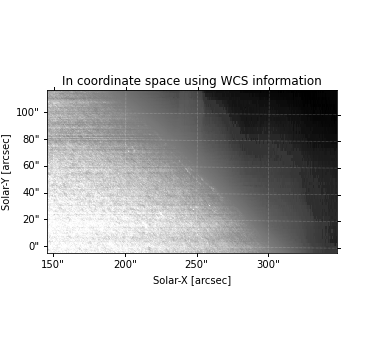
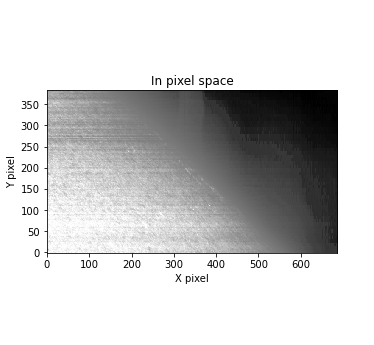
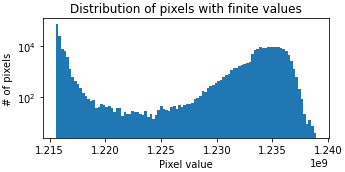

In [11]:
hinode_map